## Analyze Type 1 & Type 2 Diabetes Patients

##### Setup the imports.

In [3]:
import site, sys
sys.path.insert(0,site.USER_SITE)

from pyqe import *
from pyqe.api.query import Query
from pyqe.api.cohort import Cohort
from pyqe.shared.b64encode_query import _EncodeQueryStringMixin

##### Always start with creating a query object. 

Apart from creating Query object, it does the following that are required for setting up your profile:
- Ask for username and password for login

In [4]:
# Always begin your script by creating Query object
total_patients_query = Query('Total_Participants')

##### Configure by selecting Study and Study config.

Use get_study_list() method to fetch all available studies that you have access to.

Use set_study() method to select a study that you are interested in (by passing the study ID).

In [5]:
total_patients_query.get_study_list()

# any STUDY_ID from above list
total_patients_query.set_study('0368b0c9-fe26-4a64-b6ba-5378914fe107') 

15-Jun-2023 05:34:04 - INFO - Token is expired. Refreshing token...
15-Jun-2023 05:34:04 - INFO - Refresh token successful


Study Name - Study Id
(1) Accept - fb4269d3-f6ac-4f81-85da-b80ce277793e
(2) Accept archive - ee451513-3daa-426a-9cfd-b5690a93a3ac
(3) CRONOS by DGPM - 38ce29c0-eb76-45cc-ba4f-56395f8c49e0
(4) DE-SynPUF 100 percent - eccf4aeb-2617-4708-a145-69e02b9a0279
(5) DE-SynPUF 5 percent - 194c627c-5098-4e6d-b849-f0e83d905e1f
(6) DE-SynPUF [Demo Dataset] - 0368b0c9-fe26-4a64-b6ba-5378914fe107
(7) Demo Study: COVID-19 symptom study - 121ec9da-3706-4e20-885d-101a7e421ed2
(8) ECOV - f875fdc4-c180-45f3-bdbb-a68fb1476338
(9) FeMFit - 69990b1e-3b4c-4e7f-9d06-84cc2cdf88d0
(10) Univie Demo-Study - 0b7e9885-ed8e-456f-89e1-0a1d3b0f615c


Similar to above step, use get_config_list() method to fetch all available configurations corresponding to the study.

Use set_study_config() method to select a config (by passing the config ID).

In [6]:
total_patients_query.get_config_list()

# any CONFIG_ID from above list
total_patients_query.set_study_config('522bcd53-1dde-456d-9cff-266b4280ad59') 

Assignment Name, Config Name - Config Id
(1) DEFAULT-ASSIGNMENT, OMOP_GDM_PA_CONF_OLD - 92d7c6f8-3118-4256-ab22-f2f7fd19d4e7
(2) Default_assignment_OMOP_GDM_PA_CONF, OMOP_GDM_PA_CONF - 522bcd53-1dde-456d-9cff-266b4280ad59
(3) GDM-PA Default, DemoGDMPAConfig - daac6e40-9fdc-48f8-bd9b-181571102d91
(4) PUBLIC-CHART_DEFAULT-ASSIGNMENT, OMOP_GDM_PA_CONF - 522bcd53-1dde-456d-9cff-266b4280ad59


In [62]:
cohort = Cohort('0368b0c9-fe26-4a64-b6ba-5378914fe107')
allCohorts = cohort.get_all_cohorts()
# Filter by cohort id "1" for diabetes cohort
diabetes_cohort = [item for item in allCohorts['data'] if item['id'] == 1][0]
f"Total participants: {len(diabetes_cohort['patientIds'])}"

'Total participants: 228'

##### Get Dataframe for Patient entity alone

In [89]:
# Generate Request for Dataframe cohort
cohort_query = Query('patients')
cohort_query.add_filters([Person.Patient()])

patient_data_request = cohort_query.get_dataframe_cohort()


# Get Patient Dataframe. Select (1) Patient
patient_df = Result().download_dataframe(patient_data_request, "patient.csv", 1)

# Peek Into the Patient Demographics Data
selective_patient_df = patient_df[['pid', 'gender', 'dateofbirth', 'ethnicity', 'race', 'state']]

selective_patient_df.head(10)

{'mriquery': b'eJydlVFvmzAQx79KxPOogABJ9paEbupLO7VTX6Y9GPtILBmbwblqVOW77wzJWjWyYu3N5o4fd//7Y79F3OxNjxU0UkuURkdfZ28RZ70YppXRCBpp/evTBg8d0Cr6JhVCv6U3oi+zSGrGUb64SMPUAPRIs3ZM3LBB8lnFkLlEYjVy94Ph3sU6htKRR8KATHO4t20NPQWTDw/vqk/ZDLGXtUW4KPc3Rc81boxRwPSWokxqolLMdC6yvq+io+OIF8f/KVuYGqKgtkodwzAPj1Fg5vmDU/+jGqfCaXsnXEqRZTUXxTxOhYA4L0oRr3jTxFlZ1nm2TJgoVu8SPkM/THOL1lMrr6MYowA7S3MBR8XeumGYphkAT6pyo2yrh3/DvRzIzbu+N+sdjG0Q0KkTuc0AfxyLPhsAgFfSVTMlhYeThnHICmgHDyMLY2yN1XjwMOZhjCeqwydJHoa4xb2WXHorKQKVPWMok0OH3AhfYWUYUbEB1xbpbABR+dtchNG+gxann+CSsQxj7EbG9QZX/4HzOzLQ2o+M++pJA13dE+J6d2mgvz/Q/M0F+rzzEwJt3nH3u/kggSZv6TDdPzQb2VOKBxXo7gOw/gop0NmC/o0rpEB/T6QKmJ8Uau3e2I5uSs8BGWhppvxzz9LxtlOylXi+6Y9jVAFHEE9oxeFWI51Iz0zZ8UpM5uWyTvgqbiAr45yVeVyXNYuL+WK5SvMG0mQRHf8CJ7TB7A==', 'cohortId': 1}


,pid,gender,dateofbirth,ethnicity,race,state
0,2,MALE,1943-01-01,Not Hispanic or Latino,White,PA
1,4,MALE,1941-06-01,Hispanic or Latino,No matching concept,CO
2,6,MALE,1943-10-01,Not Hispanic or Latino,Black or African American,NY
3,19,FEMALE,1942-07-01,Not Hispanic or Latino,White,UT
4,25,MALE,1965-04-01,Not Hispanic or Latino,White,AZ
5,27,FEMALE,1940-04-01,Not Hispanic or Latino,White,OR
6,30,FEMALE,1959-11-01,Not Hispanic or Latino,White,CA
7,44,FEMALE,1957-11-01,Not Hispanic or Latino,White,VA
8,56,MALE,1943-10-01,Not Hispanic or Latino,White,PA
9,63,FEMALE,1964-05-01,Not Hispanic or Latino,White,CA


In [90]:
# Generate Measurement Request for Dataframe cohort
cohort_measurement_query = Query('Measurement')
diabetes_Measurement = Interactions.Measurement("Type 1/2 Diabetes condition")
cohort_measurement_query.add_filters([diabetes_Measurement])
measurement_data_request = cohort_measurement_query.get_dataframe_cohort()
measurement_df = Result().download_dataframe(measurement_data_request, "measurement.csv", 1)
selective_measurement_df = measurement_df[['pid','measurementdate']]
selective_measurement_df.head(2)

{'mriquery': b'eJytlcFunDAQhl8F+VwosMAuvaWhlXJJqzbKperB4CGxBIba41VW0b57x6bbRFFJtoITtmfm/2bG2H5kzXA/aKyglUqiHBT7EDyyhmthptGgEBTS+MeLCR5GoBH7LDsEfUkR7F3ApOINyr2ztLwzQEuK997xhgKC5H0aVJLXgGAC0hMTlNxo0sq7rxzvnfPIURIqkkTUTnJQJuqBG6uhdzl4lkGuGri2fQ2aopJni1fVOTJR4oQ4opa1pZRe1vyTrKdCPw5DB1xdkpVLRUCyDaOzXFxX7Oh0xN6hb2QPU1fIqGzXHc+T+fKNnel5Ak49qzjyU+I0vRLOJU/TuhH5JkyEgDDLCxGWTduGaVHUWbqLucjLp7bfgjbT5rOLqZQH3wzfgDtLmwtOFbV1Ozq0rQHXn9gLdLZX5u8f8h+bGD01PrL0+1F0AyN9BPhaiepayNzEwC8HpNyWUBAecM+7GfVkoTopW7K8XUa6EPRsWYoZxmY9xp+CZlHZ6qhXepcvhI2zZRTrlSE4zuW/XY/iL4p/U3brUt7elnI9oH8wZk7o0gtA2f6V85/4+7eTvcTTA3b01g4aBPEdrTh8ojOHh1t31F10vCl2ddyUYQtpEWa8yMK6qHmYb7a7MslaSOItO/4GtU+E6A==', 'cohortId': 1}


,pid,measurementdate
0,1001,2009-08-05
1,1001,2010-09-12


In [91]:
# Generate Device_Exposure Request for Dataframe cohort
cohort_Device_exposure_query = Query('Device_Exposure')
diabetes_Device_Exposure = Interactions.DeviceExposure("Type 1/2 Diabetes condition")
cohort_Device_exposure_query.add_filters([diabetes_Device_Exposure])
Device_Exposure_data_request = cohort_Device_exposure_query.get_dataframe_cohort()


# Get Device_Exposure Dataframe. Select (1) Patient
Device_exposure_df = Result().download_dataframe(Device_Exposure_data_request, "Device_exposure.csv", 1)
selective_Device_exposure_df = Device_exposure_df[['pid','enddate']]
selective_Device_exposure_df.head(2)

{'mriquery': b'eJytlMFunDAQhl8F+Vy2wAK7m1saWimXtGqjXKoejD1OLIFN7WGVVbTv3jGUpIpEutFy8/gf/59nxvITE/bBOqxAaaNRW8MuoicmuJN+XFmDYJDWP18FeOiAVuyLbhDcFZ1gHyKmDReo90FRvPFAW4a3Q+ItHYjSj1lUaV4Dgo/IT45QSqNA6ftvHB9CcsdRE2qlieiCpTV+JWGvBcBjZ33vYMR55EbATd/W4Ohg+s/mdXWi0yoNXhzR6bqni72u/BepU7mfrG2AmytSuTbEJM12Qbm8qdgx+Mh9oN/qFsbekGj6pjmeZvP1OzsxcwKOnas48uniFF7LkFJkWS1ksY5TKSHOi1LGO6FUnJVlnWfbhMti99L8O3B+fALscizlcWjG0ID7nkYMwRVdH+ZqlfIQ+pMMBk3fGv/8Tt43ytVL7/8qofrh4QQQcUMTWQg8/A5Iut1iHLIR0KGwcg6XLoX7PypbCjUpWs6Q1ueTulnzfKky3ngExcJTmS2mPB9EP5JDyXGuls35CDDyDcB2+FQa3Wqc/ubjIDYgEOQP7OXhs0GNhzve9MPPk6zLbZ2IXawgK+Ocl3lclzWPi/Vmu0tzBWmyYcc/j2IexQ==', 'cohortId': 1}


,pid,enddate
0,1020,2010-02-24
1,1024,2010-01-21


In [92]:
# Generate Condition Occurrence Request for Dataframe cohort
cohort_cond_occ_query = Query('Condition Occurrence')
diabetes_cond_occ = Interactions.ConditionOccurrence("Type 1/2 Diabetes condition")
cohort_cond_occ_query.add_filters([diabetes_cond_occ])
cond_occ_data_request = cohort_cond_occ_query.get_dataframe_cohort()


# Get Device_Exposure Dataframe. Select (1) Patient
cond_occ_df = Result().download_dataframe(cond_occ_data_request, "Cond_occ.csv", 1)
selective_cond_occ_df = cond_occ_df[['pid','conditionname','startdate','enddate']]
selective_cond_occ_df.head(2)

{'mriquery': b'eJy1lktv2zAMgP+KofOcxc/Eu3XNBvTSDVvRy7CDLNGtAEfKJCpYUOS/j5KXdijiJRucG2lS/PjQw09MmEdjcQWd0gqV0exd8sQEt9INktEIGkn+9krB3QZIYh9Vj2CvaQV7kzCluUC1DZaO9w7ok+br6HhHC5LsbZ6sFG8BwSUUTw5QciOlUw+fOT4G5w1HRaiZIqINIY12s2d/I4S3FrSAgemQk3zr1y1YWp398fFm9S/hZlkIyBGtaj2l+LoH38l6KPy9MT1wfU1WrjSByWY2wXJ1u2L7EEduQwp3ag1Dl8iofd/vzwvz6Qs70/MAHHq44sgPiZN6I4NLleetkFWRZlJCWla1TBvRdWle122ZL+dcVs3LGO7BumEzsKuhlJ+xGbEBD56GDSEqWh8mbLrOQejPPAbo/Vq75x3zH0OdvQzgmFnFnWYoh9BQFhQHPwKeMp2USYKADY4CswmBv1nCSBih5VOXF0/mcVYxNStu4uOs8hKs0+2spsY6460Yo9WXoZ0uczE5GDl6N0JbXoZ2usxmIvBm/LBPdb1QSRYlx7FSsqmuFdDyb5ip7pOtcgrPuJ6zIj5nvVorPPwf7KO1B4Egv6KXuw8aFe7uee/jmzcv6mU7F03aQV6nJa/LtK1bnlbFYtlkZQfZfMH2vwBFwwiM', 'cohortId': 1}


,pid,conditionname,startdate,enddate
0,1001,Sepsis,2010-04-28,2010-04-28
1,1001,Coronary arteriosclerosis,2010-05-09,2010-05-09


In [93]:
# Generate Visit Occurrence Request for Dataframe cohort
cohort_visit_occ_query = Query('Visit Occurrence')
diabetes_visit_occ = Interactions.Visit("Type 1/2 Diabetes condition")
cohort_visit_occ_query.add_filters([diabetes_visit_occ])
visit_occ_data_request = cohort_visit_occ_query.get_dataframe_cohort()


# Get Visit Occurrence Dataframe. Select (1) Patient
visit_occ_df = Result().download_dataframe(visit_occ_data_request, "Visit_occ.csv", 1)
selective_visit_occ_df = visit_occ_df[['pid','enddate']]
selective_visit_occ_df.head(2)

{'mriquery': b'eJytlFFP2zAQx79K5OelJGmStnsDwiReGNoQL2gPjn2BkxI7iy/VKtTvvrOjAkKUVe3ebN/59z//z/azUPbJDlRBgwYJrRFfo2eh5KDdNLKGwBCPH95NaNMDj8Q3bAmGS94hvkQCjVSEax9pZOuAl4zsQuIdb4jSsyyqUNZA4CLm6UmU03jS4OOtpCef3EtClpohKw4eaY2brdEhTSqOpFFwM3Y1DJyfvlm8rj4HzFKPkEQD1iOX8f6cvzi6O9yFtS1Ic8lRiYalOGZ7Hzm/qcTWc/Tai95hB5MTHDRj224Pw3z/IQ7M3AlOPlWS5K5wnl5rn1JkWa10MY9TrSHOi1LHK9U0cVaWdZ4tE6mL1avV9zC4qeHifDrKn2BGMOBx5IaCp9Iw+i7apnHg/UkCoB07415uxUGNm71aPi1guDGWdbxpwk8c/PYSXM0JXN6ooN+PT/8LXlkNewSy0wTCg/mYPD+NHG7Zx+T8dPK/jSmOFun3drM8msnfxUBa0r5qF0eTwehPuMvw4lvskHbf5DYEW1AE+ieNenNlCGlzL9sxfAvJvFzWiVrFDWRlnMsyj+uylnExXyxXad5AmizE9i8eB+8A', 'cohortId': 1}


,pid,enddate
0,1001,2010-03-10
1,1001,2010-08-28


In [94]:
# Generate Procedure Occurrence Request for Dataframe cohort
cohort_proc_occ_query = Query('Procedure Occurrence')
diabetes_proc_occ = Interactions.ProcedureOccurrence("Type 1/2 Diabetes condition")
cohort_proc_occ_query.add_filters([diabetes_proc_occ])
proc_occ_data_request = cohort_proc_occ_query.get_dataframe_cohort()


# Get Visit Occurrence Dataframe. Select (1) Patient
proc_occ_df = Result().download_dataframe(proc_occ_data_request, "Proc_occ.csv", 1)
selective_proc_occ_df = proc_occ_df[['pid','procdate']]
selective_proc_occ_df.head(2)

{'mriquery': b'eJytVU1v2zAM/SuBznNmO7YT99bVG9BLN2xFL8MOskS3BGzJteliQZH/Pkpe2qGrmyDuTRTJ98hHfTwKZe9sRwVUaJDQGnG2eBRKdrofV9YQGOL1zxcGbVvglfiCNUF3wRniw0KgkYrwwXkqWffAW0Y2PvCaExbRx3hRoCyBoF8wnh5JOYyNCm+/Sbpzwa0kZKolMmPnIK3pl21n1UjSkzQKroamhI7Do382L4s385eRQ5BEHZYDF/Gyy1/s3bf2ydoapLlgr0TDTOyzrfOcXxVi53D0g+O8xgZGHdhphrreHQfz9bs4MnJPOKpUSJL7wtm81C4kjeNS6XQVRFpDkKSZDnJVVUGcZWUSb0Kp0/xZ6Bvo+nHc4nxs5bcXwwtwO/A4waFSN7gZ2qrqwekTeoB6aEz/dCaOGdvyWXFv+44dMPM40YQzerh3FFzNLFxOVdAS6gmC6J0IlNVTPcQnU0xWvToVsrEaK/x7mP7HTebiHpI7fSeCN+TO5kzUv0+v465Pxb2n7QTkZk6pWtJUqfkc3IM3ZtadPDy/aNaVdKoQTg4xiv0bW2ODtP+Wdt5bgyLQP2jQ28+GkLY3sh78Qxyusk0ZqjyoIM6CRGZJUGalDNLVepNHSQVRuBa7Pxeda7I=', 'cohortId': 1}


,pid,procdate
0,1001,2009-08-05
1,1001,2009-08-05


In [95]:
# Generate Death Request for Dataframe cohort
cohort_death_query = Query('Death')
diabetes_death_occ = Interactions.Death("Type 1/2 Diabetes condition")
cohort_death_query.add_filters([diabetes_death_occ])
death_request = cohort_death_query.get_dataframe_cohort()


# Get Death Dataframe. Select (1) Patient
death_df = Result().download_dataframe(death_request, "Death.csv", 1)
selective_death_df = death_df[['pid','deathdate']]
selective_death_df.head(2)

{'mriquery': b'eJylU8Fu2zAM/RVD5zmzHdtNeuvqDeilG7ail2EHWqJaAbLkWXSxoMi/j5KRdiiQIWhuoh71HvlIPQvpH/1EHWrjDBnvxGX2LCRMKiwn7wgd8fnnm4B2I/JJfDGWcLrmF+JDJowDSeYpIhpsQL5yMKTEO36QlR+rrDPQI2HImE8topzGgTYP34AeY/IIZFhqZVhxipTehZXCiCaVQOAk3s5DjxPnl/9c3nT/J1iVkQKIJtPPXMbbPn8xemjuk/cWwV0zCsaxFGN+jMjVbSf2kUc9RdE7M+DiBINutnZ/Gs3X7+LEzIPg4lMHBIfCObxRMaWpql6qZp2XSmFeN63Kt1LrvGrbvq42Bahm+2r1PU5hGbi4Wlr5k8xIBjzMPFCMrDTNcYpe64DRnyIR2Hlw4WUrThrc6tXy5UIBYeqPlaJtIgYBf0cRrudMZuKJHGEv380+GnWEszqv4jh/fixxJOnVscLX54scYa7TFlozGDp83X0CLUpC9YNmtfvsyNDuHuycVrVYt5u+kNtcY9XmNbR13rc95M36YrMta41lcSH2fwFeGXAx', 'cohortId': 1}


,pid,deathdate
0,1043,2010-04-01
1,190,2009-09-01


In [96]:
# Generate Observation Request for Dataframe cohort
cohort_obs_query = Query('Observation')
diabetes_obs_occ = Interactions.Observation("Type 1/2 Diabetes condition")
cohort_obs_query.add_filters([diabetes_obs_occ])
obs_request = cohort_obs_query.get_dataframe_cohort()


# Get Visit Occurrence Dataframe. Select (1) Patient
obs_df = Result().download_dataframe(obs_request, "Obseravtion.csv", 1)
selective_obs_df = obs_df[['pid','obsdate']]
selective_obs_df.head(2)

{'mriquery': b'eJytlsFu2zAMhl8l0HnOYsd24t66egN66Yat6GXYQbboVoAtpRYVNCjy7qPsug06aEmh3CRS+n6RFG09s1o/6B5LaKSSKLViF7NnVvNemHGkFYJCGv9+N8HdBmjEvskWob+iHezTjEnFa5Rb52l4a4BMinfDwlvaMIs/J7NS8goQzIx4YhSlZTRp5P0Pjg9u8YajJKm5JMXeIbUyc10Z6Ld82iGVQa5quLFdBT3tig+M1+UpmHnsQByxl5WlI72P+Q95p0C/aN0CV1fk5VKRIPn0xnkub0q2dxyxddK3soMxK+RUtm33p2G+/2QnrpwEx5yVHPl0cJpeC7ckS5KqFtkyioWAKM1yERV100RJnldpsl5wkRVvab+D3ozFZ5djKE9DMoYE3FsqLjgq9tZVVDeNAZefxQBobafM6w35QBHnb4l35iFuhyc1lzrmJgYenRCdKZA+mZ0KgWrYoBQeuThc7kCm1sIXVxIopGy35a0HvgyEE9kCN8ejSM8q5K1KFioDfUXGDuEJPRJ5oIRD+wuyCqQ/Wt7KRr58Cf7lr8P5chQ4VoriXJEcv1zxGXp/+AV58Gfo9cns/56E9jmZT8hUaMOTWXD04kPbfOPPT2hrv5ycmtt7+tDWtvQ+8rFDG9uxj/6TQrv7QOR/l6gY3iCt7CROj7j94G2hRhC/0IrdV4USd3fus+12L5b5ulrURdRAkkcpz9OoyiseZcvVuojTBuLFiu3/Aqtwj60=', 'cohortId': 1}


,pid,obsdate
0,1001,2009-12-22
1,1001,2010-02-12


In [88]:
# Generate Drug Exposure Request for Dataframe cohort
cohort_de_query = Query('Drug Exposure')
diabetes_de_occ = Interactions.DrugExposure("Type 1/2 Diabetes condition")
cohort_de_query.add_filters([diabetes_de_occ])
de_request = cohort_de_query.get_dataframe_cohort()


# Get Visit Occurrence Dataframe. Select (1) Patient
de_df = Result().download_dataframe(de_request, "DrugExposure.csv", 1)
selective_de_df = de_df[['pid','enddate']]
selective_de_df.head(2)

{'mriquery': b'eJytllFv2yAQx79K5Oc5sx3bTfbWNZvUl27aqr5Me8DmnCJh8OCIGlX57jvspY2qOsmEnwwc/H/cHYd5jmr9qA2uoRFKoNAq+jR7jmpmuB1aWiEopPavNx3cdUCt6KuQCOaGVkQfZpFQrEax9ZaGSQs0pFjbT7ynBbP0YzZbC1YBgp2RHh+gNI06jdh8Z/joJ3cMBaHmgojGS2pl59y4DTx12joDA8wiUzXcubYCQ8vSo8Hb9UU689QrMUQjKkebeuv1b7IeXP2stQSmbsjKhCIi2XTnLdd362jvdfjWs+9FC0NcyKiclPvLZL79iC6ceQAOUVszZIeNU/eW+ylFllU1LxZxyjnEeVHyeFU3TZyVZZVny4TxYvUa+Acwdkh/dD248tQHow/AxlF6wauicT6numks+PgkvYB0rbIvZ+R/0jh/jfycs521ruvkrveTiD58ke9Y+ONhtK8gwhZMRfNbUJwzhBFMGorpBB+RzkKlrdiMSC9CpY/HRx3Ip6DQ8ho6HIUUE0JqzcfyXIZijKZPf729D7iaBHAuWsspKSfCtQrlSI1quKlH6i64vv34iXykwZVNvxaDp66O4AL34/31PwKYpMw94NyxSicp9SPSiaOVBlf8mRs9uNQt6s4As8Nb5T1EcLG/nC3/gxqjhBc7vfSktGP6wUX+LxEnfMiS/o0jRSvw8Ezc91YJNQL/iY7vvigUuHtg0vUPoWRRLqukXsUNZGWcszKPq7JicbG4Wq7SvIE0uYr2fwFR9rPg', 'cohortId': 1}


,pid,enddate
0,1001,2010-08-22
1,1001,2010-02-12


##### Define the Necessary columns required for our analysis and get their data. Patient ID, Interactions End date, Date of death are some of the below ones.

##### Combine data from different Interaction entities for end date and choose patient's last interaction end date / Max End Date.

In [97]:
import pandas as pd

concatenated_dfs = pd.concat([
                                selective_measurement_df.rename(columns={'measurementdate': 'enddate'}), 
                                selective_Device_exposure_df,
                                selective_visit_occ_df,
                                selective_proc_occ_df.rename(columns={'procdate': 'enddate'}),
                                selective_obs_df.rename(columns={'obsdate': 'enddate'}),
                                selective_cond_occ_df,
                                selective_de_df

])
concatenated_dfs_max_enddate = concatenated_dfs.groupby(['pid'],as_index=False)['enddate'].max().reindex(columns=['pid', 'enddate'])
concatenated_dfs_max_enddate.head(10)

,pid,enddate
0,2,2011-01-30
1,4,2010-09-23
2,6,2010-09-26
3,19,2010-05-06
4,25,2010-12-01
5,27,2010-11-18
6,30,2010-12-29
7,44,2010-11-25
8,56,2010-10-18
9,63,2010-10-17


##### Filter the Diabetes condition and choose the patients earliest date of diagnosis / Minimum start date

In [99]:
condOcc_df = selective_cond_occ_df
condOcc_diabetes_df = condOcc_df[condOcc_df['conditionname'].str.contains("diabetes")]
co_pid_start_date_df = condOcc_diabetes_df[['pid', 'startdate']]
co_pid_groupby_start_date_min_df = co_pid_start_date_df.groupby(['pid'],as_index=False)['startdate'].min().reindex(columns=['pid', 'startdate'])
co_pid_groupby_start_date_min_df.head(10)

,pid,startdate
0,2,2009-05-11
1,4,2009-11-25
2,6,2009-12-21
3,19,2008-01-03
4,25,2008-03-22
5,27,2009-05-04
6,30,2008-07-13
7,44,2008-01-10
8,56,2008-04-17
9,63,2008-03-04


##### Form the table with surival period and binary values for dead or alive for the cohort for Kaplan Meier Analysis

In [101]:
import pandas as pd
death_df = selective_death_df
joined_death_condOcc_df = pd.merge(co_pid_groupby_start_date_min_df, death_df, on='pid', how='left')
joined_death_start_end_df = pd.merge(joined_death_condOcc_df, concatenated_dfs_max_enddate, on='pid', how='inner')
joined_death_start_end_df['Dead'] =  joined_death_start_end_df.apply(lambda row: 0 if pd.isnull(row['deathdate']) else 1, axis=1)
joined_death_start_end_df['Survival_days'] = joined_death_start_end_df.apply(lambda row: (pd.to_datetime(row['enddate']) - pd.to_datetime(row['startdate'])).days if pd.isnull(row['deathdate']) else (pd.to_datetime(row['deathdate']) - pd.to_datetime(row['startdate'])).days, axis=1)

joined_death_start_end_df = joined_death_start_end_df.sort_values(by=['Survival_days'], ascending=True)
joined_death_start_end_df.head(10)

,pid,startdate,deathdate,enddate,Dead,Survival_days
156,755,2010-08-31,NaN,2011-01-08,0,130
61,330,2010-06-24,NaN,2010-11-08,0,137
49,282,2010-04-04,NaN,2010-11-04,0,214
67,343,2010-03-01,NaN,2010-10-27,0,240
184,888,2010-03-07,NaN,2010-11-20,0,258
222,1069,2009-08-09,NaN,2010-05-06,0,270
2,6,2009-12-21,NaN,2010-09-26,0,279
198,963,2009-10-21,NaN,2010-08-05,0,288
1,4,2009-11-25,NaN,2010-09-23,0,302
173,848,2010-01-12,NaN,2010-12-24,0,346


### Kapalan Meier 

##### With the above dataframe and using the lifelines library, Kapalan Meier Survival curve is plotted along with censor ticks on display. 
##### With Date of diagnosis for Diabetes as start event and date of death as the end event.

##### From the below curve, the survival looks quite good after diagnosis of Diabetes.

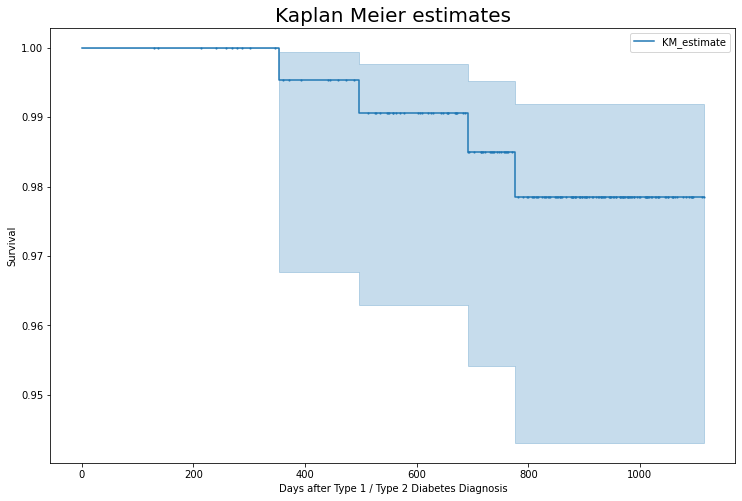

In [102]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
T = joined_death_start_end_df['Survival_days']
E = joined_death_start_end_df['Dead']
kmf.fit(T, event_observed=E)  # or, more succinctly, kmf.fit(T, E)
plt.figure(figsize=(27,8))
ax1 = plt.subplot(121)

kmf.plot_survival_function(show_censors=True, ax=ax1, censor_styles={'ms': 1, 'marker': 's'})

plt.title("Kaplan Meier estimates", fontdict={'fontsize':20})
plt.xlabel("Days after Type 1 / Type 2 Diabetes Diagnosis")
plt.ylabel("Survival")
plt.show()

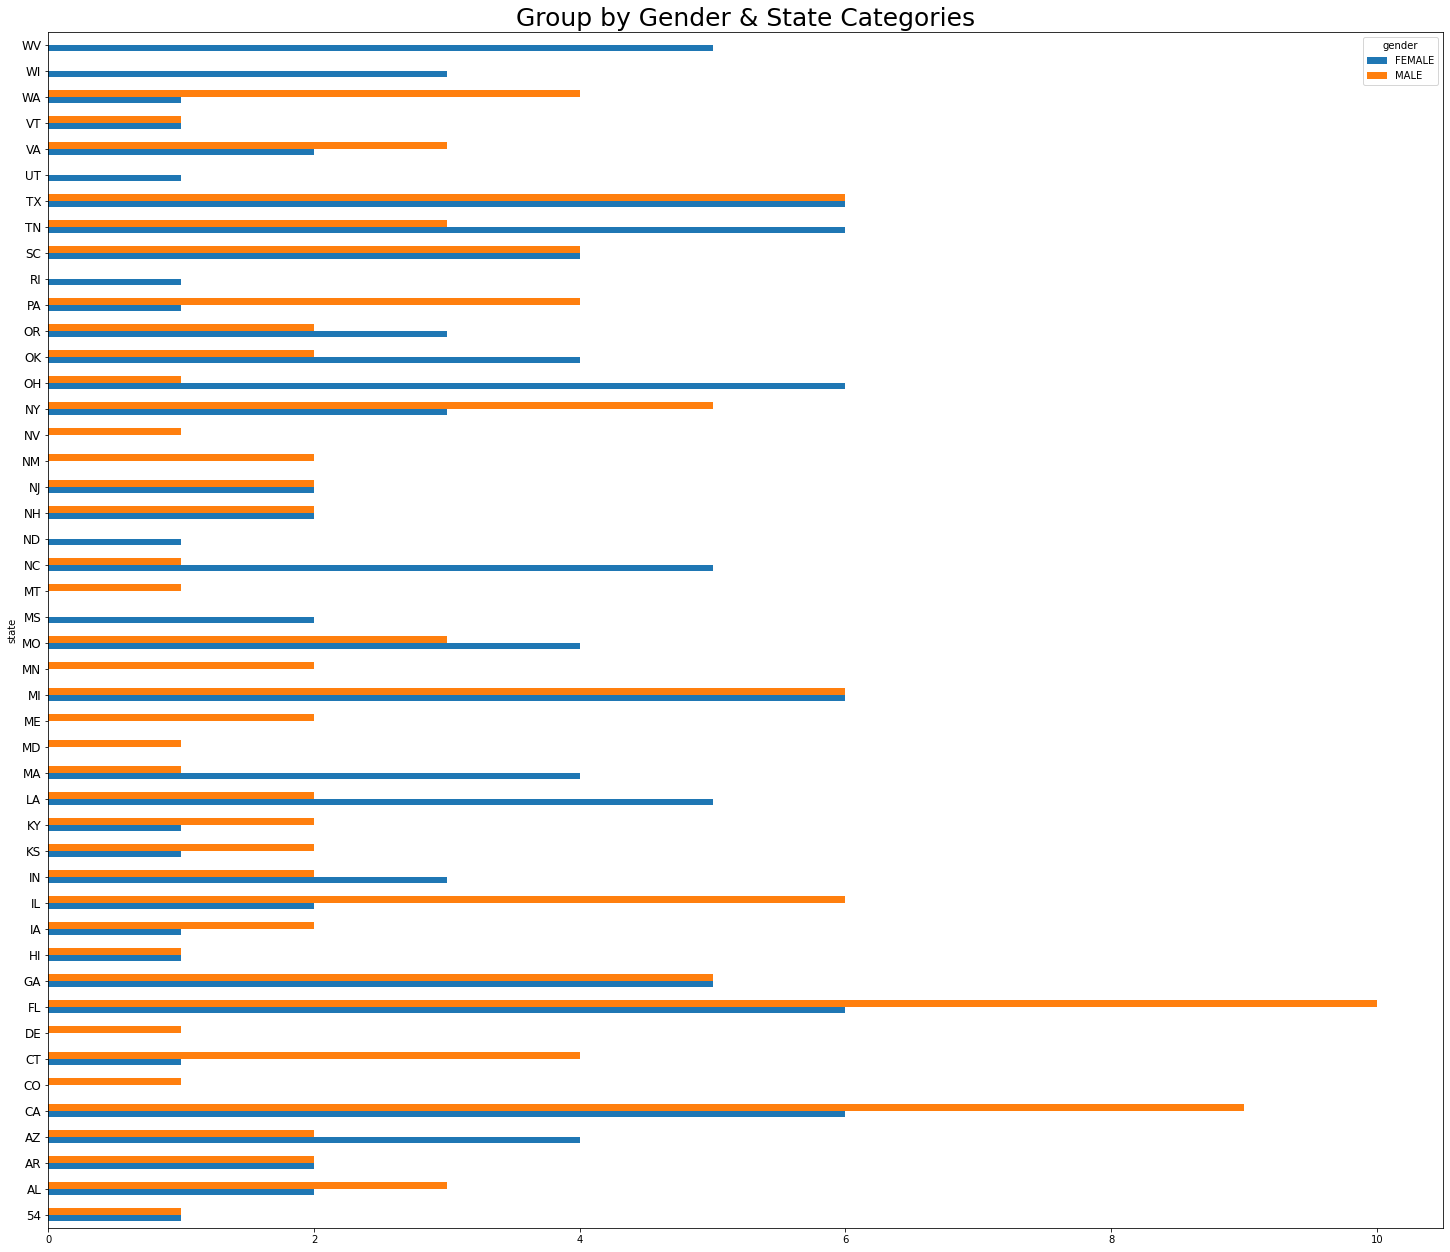

In [103]:
import pandas as pd

barh_table = pd.crosstab(selective_patient_df.state, selective_patient_df.gender)
ax = barh_table.plot.barh(figsize=(25,22), title='Group by Gender & State Categories')
ax.yaxis.set_tick_params(labelsize='large')
ax.title.set_size(25)

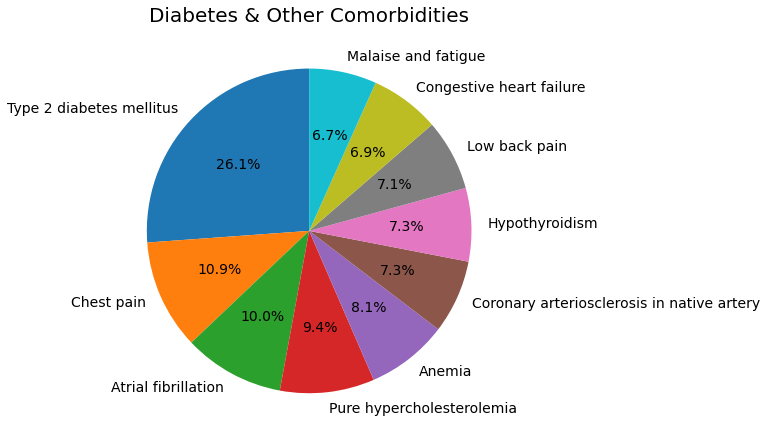

In [104]:
import matplotlib.pyplot as plt

# Group Data by Conditions
co_mini_df = condOcc_df[['conditionname', 'pid']]
co_group_df = co_mini_df.groupby(['conditionname']).count()
co_group_df.rename(columns = {'pid':'count'}, inplace = True)

# Sort & Pick the top 10 conditions
co_group_df.sort_values(by=['count'], inplace=True, ascending=False)
co_group_df_top10 = co_group_df.head(10)
plt.figure(figsize=(16,8))

# plot pie chart
ax1 = plt.subplot(121)
co_group_df_top10.plot(kind='pie', y = 'count', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)

plt.title('Diabetes & Other Comorbidities', fontdict={'fontsize':20})
plt.axis('off')
plt.show()